In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [22]:
# data check

df = pd.read_csv('dataset/dataset/abalone.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


모두 독립변수이고 마지막까지가 종속변수다.
- 어떻게 알 수 있나?: 데이터 가져올 때 명시

## Data Preprocessing

### one hot vector

In [23]:
with open('dataset/dataset/abalone.csv') as csvfile:    # csvfile 이라는 이름으로 저장 (열기)
    csvreader = csv.reader(csvfile)
    # 첫번째 행은 변수 이름인 문자열이므로 next 함수로 건너뛴다.
    next(csvreader)
    
    # check
    rows = []
    for row in csvreader:
        rows.append(row)

1행이 `['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']` 처럼 변수 정보를 담고 있으므로 next 함수로 넘긴다.

2행부터 확인되는 데이터 중 object type의 data는 one hot vector 처리한다. 

In [24]:
input_cnt, output_cnt = 10, 1   # one hot encoding 하면 f m i 가 포함된 sex column이 3개로 늘어나기 때문
data = np.zeros([len(rows), input_cnt + output_cnt])

print(data.shape)   # shape() 라고 쓸 수 없다.

(4177, 11)


In [25]:
for n, row in enumerate(rows):
    if row[0] == 'M': data[n, 0] = 1 
    elif row[0] == 'F': data[n, 1] = 1 
    elif row[0] == 'I': data[n, 2] = 1

    data[n, 3:] = row[1:]

In [26]:
data[:5]    # 제대로 encoding 된 것을 확인 할 수 있다.

array([[ 1.    ,  0.    ,  0.    ,  0.455 ,  0.365 ,  0.095 ,  0.514 ,
         0.2245,  0.101 ,  0.15  , 15.    ],
       [ 1.    ,  0.    ,  0.    ,  0.35  ,  0.265 ,  0.09  ,  0.2255,
         0.0995,  0.0485,  0.07  ,  7.    ],
       [ 0.    ,  1.    ,  0.    ,  0.53  ,  0.42  ,  0.135 ,  0.677 ,
         0.2565,  0.1415,  0.21  ,  9.    ],
       [ 1.    ,  0.    ,  0.    ,  0.44  ,  0.365 ,  0.125 ,  0.516 ,
         0.2155,  0.114 ,  0.155 , 10.    ],
       [ 0.    ,  0.    ,  1.    ,  0.33  ,  0.255 ,  0.08  ,  0.205 ,
         0.0895,  0.0395,  0.055 ,  7.    ]])

In [27]:
train_ratio = 0.85
test_begin_index = int(data.shape[0] * train_ratio)
print("test_begin_index :", test_begin_index)

test_begin_index : 3550


In [28]:
# data.shape : (4177, 11)

shuffle_map = np.arange(data.shape[0])  # 데이터의 개수만큼 인덱스 생성
np.random.shuffle(shuffle_map)  # 섞는다.

# shuffle_map 생성한 이유? : shuffle_map이 index이므로 이 index를 기반으로 row를 섞는다.

In [29]:
train_data = data[shuffle_map[:test_begin_index]]

# check
print(data[:3])
print("==="*20)
print(train_data[::3])

[[ 1.      0.      0.      0.455   0.365   0.095   0.514   0.2245  0.101
   0.15   15.    ]
 [ 1.      0.      0.      0.35    0.265   0.09    0.2255  0.0995  0.0485
   0.07    7.    ]
 [ 0.      1.      0.      0.53    0.42    0.135   0.677   0.2565  0.1415
   0.21    9.    ]]
[[ 0.      1.      0.     ...  0.3075  0.37   11.    ]
 [ 0.      0.      1.     ...  0.017   0.0225  5.    ]
 [ 0.      0.      1.     ...  0.02    0.025   6.    ]
 ...
 [ 1.      0.      0.     ...  0.0885  0.175   8.    ]
 [ 1.      0.      0.     ...  0.0345  0.057   8.    ]
 [ 0.      0.      1.     ...  0.1175  0.168   9.    ]]


In [30]:
test_data = data[shuffle_map[test_begin_index : ]]

In [31]:
train_X, train_Y = train_data[:, : -output_cnt], train_data[:, -output_cnt:]
test_X, test_Y   = test_data[:, : -output_cnt], test_data[:, -output_cnt:]

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(3550, 10)
(3550, 1)
(627, 10)
(627, 1)


### $Z-Score\ Normalization = \frac {x - \bar{x}}{\sigma}$


In [32]:
# 각각의 변수마다 평균을 구하는 것이 목표이므로 x 축 방향이 아니라 y 축으로 계산해야 한다 : axis = 0

train_X_mean = np.mean(train_X, axis=0)
train_X_std = train_X.std(axis=0)

In [33]:
print(train_X_mean)
print("==="*30)
print(train_X_std)

[0.36760563 0.30873239 0.32366197 0.52349155 0.40738169 0.13942254
 0.82816211 0.3591738  0.18028577 0.23867958]
[0.48215322 0.46197046 0.46787274 0.12088552 0.09987758 0.04254398
 0.49237063 0.22288101 0.10967459 0.1398645 ]


In [34]:
# 수식 적용 : train
train_X -= train_X_mean
train_X /= train_X_std

In [35]:
# 수식 적용 : test

# [주의] test데이터는 우리에게 있지 않다고 가정해야 한다. (보통 모르므로)
# 평균과 표준편차를 test data의 mean, std가 아닌 **train**의 mean, std를 사용할 것

test_X -= train_X_mean
test_X /= train_X_std

z score는 각각의 정규분포를 균일화 뭐였지?  
그러니까 분포가 다를 때 사용하는것이 좋다  
describe 로 살펴볼것. mean이나 mean, std가 다 비슷한걸 보면 이 데이터는 z score를 굳이 쓰지 않아도 된다.  

=> 차이가 별로 나지 않는 데이터를 정규화 할 필요는 없다.

In [56]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Modeling (1) 

hidden layer O

In [36]:
GJ_NET_MODEL_V1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation = 'elu', input_shape = (10,)),
    tf.keras.layers.Dense(units=24, activation='elu'),
    tf.keras.layers.Dense(units=36, activation='elu'),
    tf.keras.layers.Dense(units=1) 
])

**마지막 layer가 특이한 이유?**
- output == 1, 하나의 값을 예측하는 회귀이므로 마지막 unit값은 1
- activation은 출력 값을 제한. 
- 값의 범위가 매우 다양할 것. 값의 범위를 제한하는 활성화 함수를 쓰면 원하는 값을 얻을 수 X

In [37]:
GJ_NET_MODEL_V1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                264       
_________________________________________________________________
dense_6 (Dense)              (None, 36)                900       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 37        
Total params: 1,311
Trainable params: 1,311
Non-trainable params: 0
_________________________________________________________________


In [38]:
GJ_NET_MODEL_V1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), 
    loss='mse')

**Sampling Gradient Descent**  [link](https://developers.google.cn/machine-learning/glossary?hl=ko#%ED%99%95%EB%A5%A0%EC%A0%81-%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95sgd,-stochastic-gradient-descent)

배치 크기가 1인 경사하강법 알고리즘. 데이터 세트에서 무작위로 균일하게 선택한 하나의 예에 의존한다.  
속도는 빠르지만 성능이나 안전성은 나쁘다. => google에서 실험

**=> Mini-batch SGD** [link](https://developers.google.cn/machine-learning/glossary?hl=ko#%EB%AF%B8%EB%8B%88-%EB%B0%B0%EC%B9%98-%ED%99%95%EB%A5%A0%EC%A0%81-%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95sgd,-mini-batch-stochastic-gradient-descent)  

하나만 사용하는것은 너무 불안정하니 미니배치개수만큼 샘플링하여 경사하강법을 적용한다.

In [39]:
history_1 = GJ_NET_MODEL_V1.fit(train_X, train_Y,
                                epochs = 25, batch_size = 32,
                                validation_split = 0.2)

# loss : 학습 데이터에 대한 loss
# val_loss : 검증 데이터에 대한 loss

Epoch 1/25
89/89 [==============================] - 0s 1ms/step - loss: 9.3577 - val_loss: 5.9072
Epoch 2/25
89/89 [==============================] - 0s 700us/step - loss: 5.2463 - val_loss: 5.2506
Epoch 3/25
89/89 [==============================] - 0s 691us/step - loss: 5.2135 - val_loss: 4.5305
Epoch 4/25
89/89 [==============================] - 0s 703us/step - loss: 4.9689 - val_loss: 4.8951
Epoch 5/25
89/89 [==============================] - 0s 669us/step - loss: 5.0558 - val_loss: 4.8079
Epoch 6/25
89/89 [==============================] - 0s 657us/step - loss: 5.3001 - val_loss: 4.8439
Epoch 7/25
89/89 [==============================] - 0s 680us/step - loss: 7.5811 - val_loss: 5.7334
Epoch 8/25
89/89 [==============================] - 0s 680us/step - loss: 7.1661 - val_loss: 6.5402
Epoch 9/25
89/89 [==============================] - 0s 669us/step - loss: 7.4905 - val_loss: 5.1774
Epoch 10/25
89/89 [==============================] - 0s 680us/step - loss: 5.2783 - val_loss: 5.3730
E

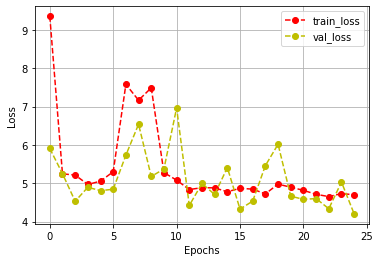

In [40]:
plt.plot(history_1.history['loss'], 'r--o', label = "train_loss")
plt.plot(history_1.history['val_loss'], 'y--o', label = "val_loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.grid()

In [44]:
pred_Y = GJ_NET_MODEL_V1.predict(test_X)

for n in range(10):
    print(pred_Y[n], test_Y[n])

[9.424431] [7.]
[10.764858] [10.]
[9.097705] [10.]
[5.9834323] [7.]
[12.225931] [16.]
[8.457502] [8.]
[11.171135] [11.]
[12.338322] [11.]
[12.22221] [9.]
[8.436243] [13.]


**더 쉽게 보자**
- 그래프에 둘 다 그려서 추이 확인
- 실수형태 -> 정수형태

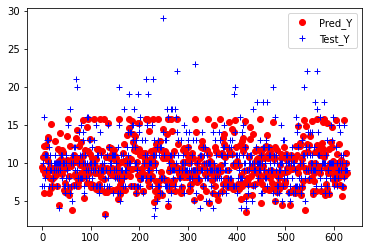

In [48]:
plt.plot(pred_Y, 'ro', label="Pred_Y")
plt.plot(test_Y, 'b+', label="Test_Y")
plt.legend()

# 이게뭐람??

그래프 보면 15 이상의 값은 대체로 예측을 잘 못했고, 그 이하의 값은 겹치는 부분이 많다.

=> 그래서 예측을 잘 한걸까? : 오차율 계산

$$Evaluation\ Index(Measuring\ Efficiency)\ = 1 - \lvert \frac{\hat{y} - y}{y} \rvert$$

In [52]:
np.abs( (pred_Y - test_Y) / test_Y )[:10]

array([[0.34634726],
       [0.07648582],
       [0.09022951],
       [0.14522396],
       [0.2358793 ],
       [0.0571878 ],
       [0.01555772],
       [0.12166561],
       [0.35802333],
       [0.35105823]])

이걸 하나로 만들어야 한다.

In [54]:
acc = 1 - np.mean(np.abs((pred_Y - test_Y) / test_Y))
print("GJ_NET_MODEL_V1 - ACC :  ", np.round(acc * 100, 3))

GJ_NET_MODEL_V1 - ACC :   85.623


정확도가 85다? 

정확도
- 70 ~ 80 : 금방 올린다
- 80 ~ 90 : 고민을 좀 해야 한다
- 90 ~ 95 : 연구의 영역
- 95 ~ 100 : 다른 세상

## Modeling (2) 

hidden layer X